## 1. Two Sum
- given an array of integers and a taget, return indices fo the two numbers such that they add upto target
- example
    - input 
        - nums: [2, 7, 11, 15]
        - target: 9
    - output:
        - [0, 9]
    

In [2]:
def two_sum(nums, target):
    dic = dict()
    for i, num in enumerate(nums):
        if num in dic:
            return [i, dic[num]]
        else:
            dic[target-num] = i
            
nums = [2, 7, 11, 15]
target = 9
two_sum(nums, target)

[1, 0]

## 2. Add Two Numbers
- You are given two non-empty linked lists representing two non-negative integers. The digits are stored in reverse order, and each of their nodes contains a single digit. Add the two numbers and return the sum as a linked list.

- You may assume the two numbers do not contain any leading zero, except the number 0 itself.

- input
    - l1: [2, 4, 3]
    - l2: [5, 6, 4]
- output:
    - [7, 0, 8]

In [82]:
class Node:
    
    def __init__(self, item=0, nxt=None):
        self.item = item
        self.nxt = nxt
        
class LinkedList:
    
    def __init__(self):
        self.head = None
        
    def add_at_begining(self, item):
        node = Node(item, self.head)
        self.head = node
        
        
    def add_at_end(self, item):
        
        if self.head is None:
            self.head = Node(item, None)
            return 
            
        
        itr = self.head
        while itr.nxt is not None:
            itr = itr.nxt
            
        itr.nxt = Node(item, None)
        
    def add_item_from_list(self, lst):
        for item in lst:
            self.add_at_begining(item)
            
    def __repr__(self):
        if self.head is None:
            return 'the linked list is empty'
        
        itr = self.head
        s = ''
        while itr.nxt is not None:
            s = s + '->' + str(itr.item)
            itr = itr.nxt
        s = s + '->' + str(itr.item)
        return s
            
        
        
    
l1 = LinkedList()
l2 = LinkedList()
l1.add_item_from_list([2, 4, 3])
l2.add_item_from_list([5, 6, 4])

def add_two_numbers(l1, l2):
    
    def create_list(ll):
        itr = ll.head
        lst = []
        while itr is not None:
            lst.append(itr.item)
            itr = itr.nxt
        return lst
    
    n1 = create_list(l1)
    n2 = create_list(l2)
    
    i = 0
    sum = []
    c = 0
    while i < len(n1) or i < len(n2) or c != 0:
        try:
            a = n1[i]
        except IndexError as e:
            a = 0
        
        try:
            b = n2[i]
        except IndexError as e:
            b = 0
            
        s = a+b+c
        c = 0
        if s > 9:
            c = s//10
            s = s%10
        sum.insert(0, s)
        
        i += 1
        
    l3 = LinkedList()
    l3.add_item_from_list(sum)
        
    return l3

add_two_numbers(l1, l2)

->7->0->8

## 3. Longest substring without repeating charactes

- input: "abcabcbb"
- output: 3
- Explaniation: the answer is 'abc', with the lenght of 3

In [90]:
def longest_substring_without_repetition(string):
    seen = []
    length = 0
    max_len = 0
    for c in string:
        if c not in seen:
            length += 1
            max_len = max(length, max_len)
            seen.append(c)
        else:
            length = 0
            seen = []
    return max_len

string = 'abcabcbb'
longest_substring_without_repetition(string)

3

## 4. Median of Two Sorted Arrays
- Given two sorted arrays num1 and num2 of size m and n, return the mdeidan of the two sorted arrays

- input
    - num1: [1, 3]
    - num2: [2]
- Output: 2


In [104]:
def median_sorted_arrays(num1, num2):
    l = 0
    arr = []
    while l < len(num1) and l < len(num2):
        if num1[l] <= num2[l]:
            arr.append(num1.pop(0))
        else:
            arr.append(num2.pop(0))
            
    if len(num1) > 0:
        arr.extend(num1)
    if len(num2) > 0:
        arr.extend(num2)
    
    # find the median of sorted array
    if len(arr)%2 == 0:
        index = len(arr)//2
        return (arr[index] + arr[index+1])/2
    else:
        index = len(arr)//2
        return arr[index]

num1 = [1, 3]
num2 = [2, 4]
median_sorted_arrays(num1, num2)

3.5

## 5. Given a string return the longest paliendromic substring

- input: 'babad'
- output: 'bab' 
- note: aba is also a valid answer

In [149]:
def longest_palndromic_substring(s):
    
    def helper(i, j):
        global pal
        global length
    
        if i > j:
            return 0
        
        if paliendrom(s[i:j]):
            if len(s[i:j]) >= length:
                pal = s[i:j]
                length = len(s[i:j])
            return 1
        
        mx = float('inf')
        for k in range(i+1, j):
            ans = helper(i, k) \
            + helper(k, j)
            
            mx = min(mx, ans)
        return mx
    helper(0, len(s))
    return pal

def paliendrom(s):
    return s == s[::-1]

# s = 'babad'
s = 'babad'
length = 0
pal = ''
longest_palndromic_substring(s)

'bab'

## 6. Zigzag conversation
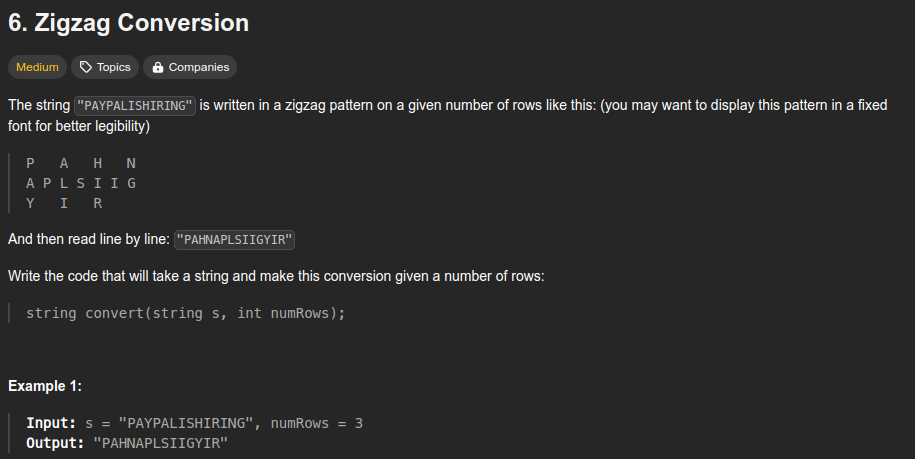
- output: PAHNAPLSIIGYIR

In [171]:
def zigzag_conversation(s, n_rows):
    
    lst = []
    while len(s) > 0:
        counter1 = n_rows
        counter2 = n_rows-2
    
        string = []
        while counter1 > 0 and len(s) > 0:
            string.append(s[0])
            s = s[1:]
            counter1 -= 1
        
        # if the string is not enough to fill the rows
        while len(string) < n_rows:
            string.append(None)
            
        lst.append(string)
        
        # to check the given string is over before bouce back
        if len(s) == 0:
            break
        
        string = []
        while counter2 > 0 and len(s) > 0:
            string.append(s[0])
            s = s[1:]
            counter2 -= 1
            
        string = string[::-1]
        # if the string is not enough to fill the bouce back
        while len(string) < n_rows-2:
            string.append(None)
            
        string.append(None)
        string.insert(0, None)
            
        lst.append(string)
    
    # now collect the characters to a string
    out = ''
    for i in range(n_rows):
        for j in range(len(lst)):
            if lst[j][i] is not None:
                out += lst[j][i]
        
    return out

s = 'PAYPALISHIRING'
n_rows = 3
zigzag_conversation(s, n_rows)

'PAHNAPLSIIGYIR'

## Revese Integer
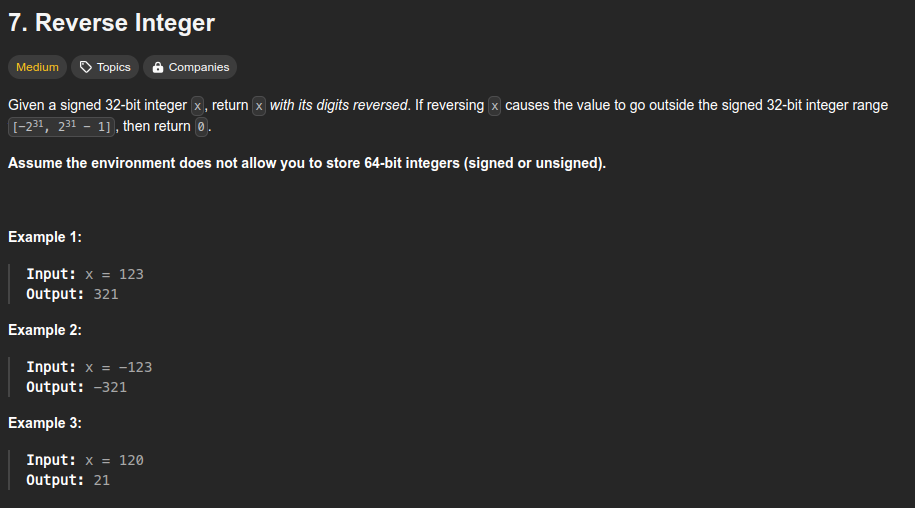

In [208]:
def reverse_int(number):
    
    out = 0
    sign = -1 if number < 0 else 1
    print(sign)
    number = abs(number)
    
    while number > 10:
        reminder = number % 10
        number = number // 10
        out = out * 10 + reminder
        
    out = (out*10 + number) * sign
    return out

number = 120
reverse_int(number)

1


21

## 8. String to Integer (atoi)
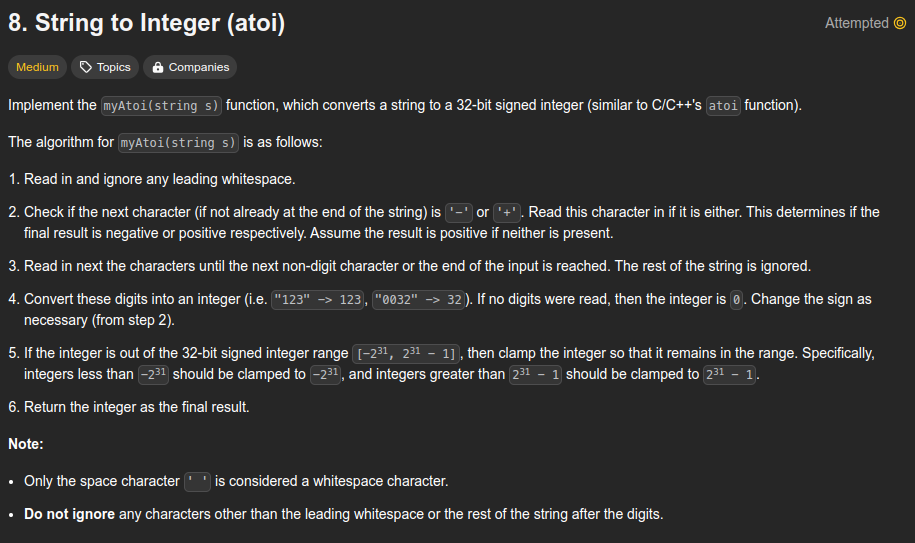

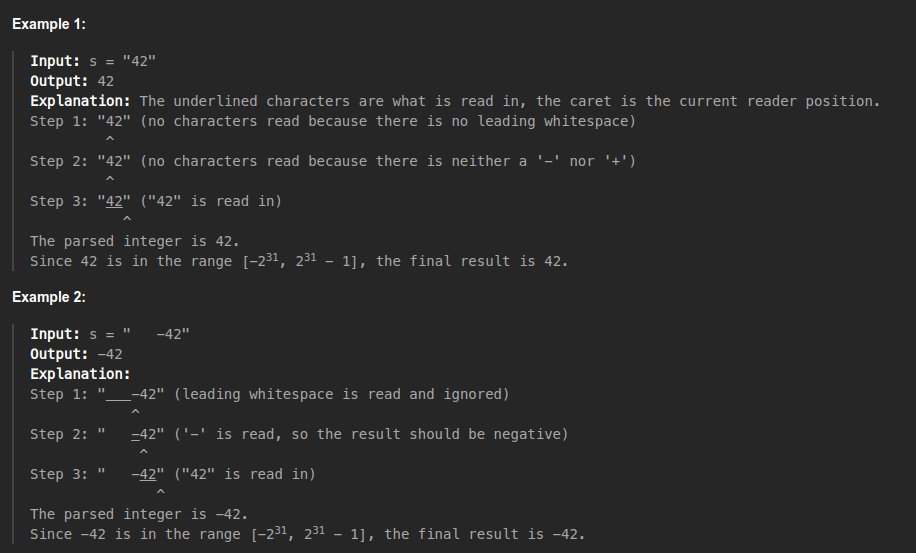

## 9. Palindrome Number
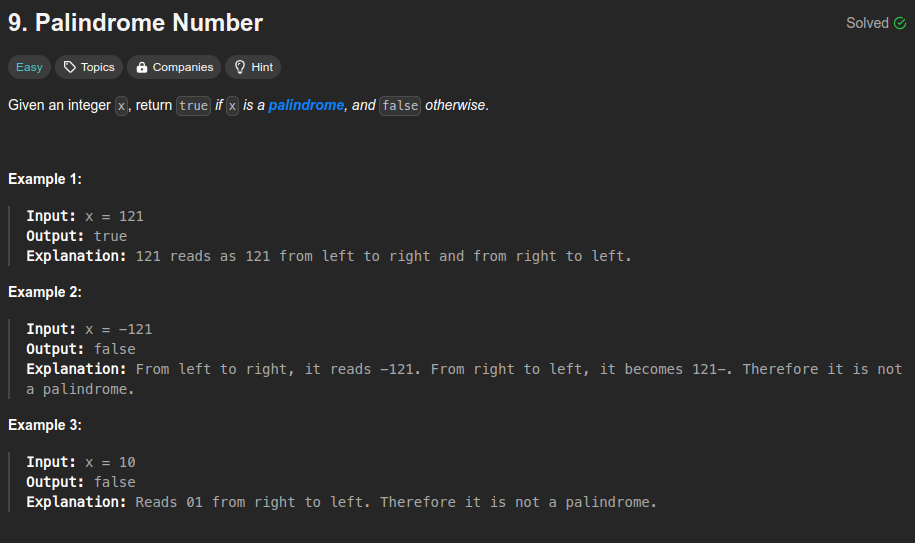

In [213]:
def pal_number(num):
    num = str(num)
    return num == num[::-1]

num = 121
pal_number(num)

True

## 10. Regular expression match
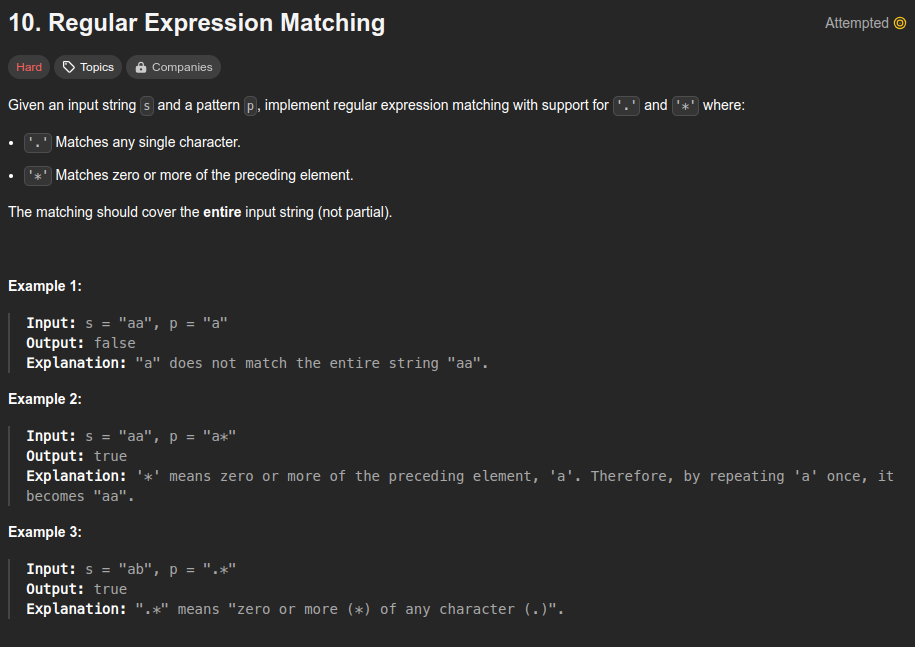

## 11. Container With Most Water
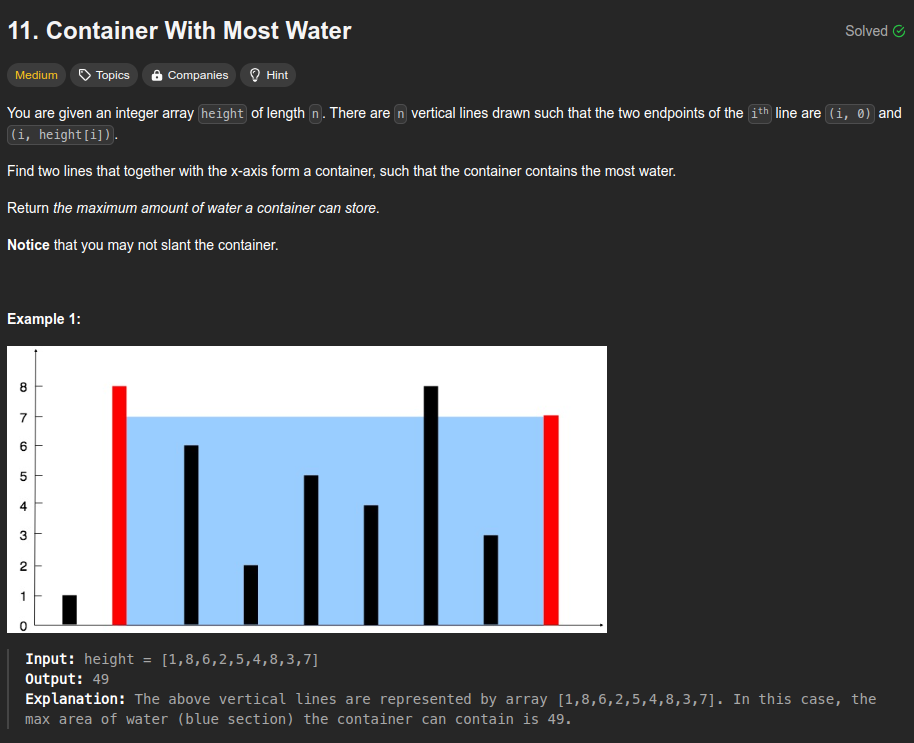

In [220]:
def container(heights):
    i = 0
    j = len(heights)-1
    
    max_area = 0
    while(j > i):
        area = min(heights[i], heights[j])*(j-i)
        if area > max_area:
            max_area = area
            
        if heights[i] > heights[j]:
            j -= 1
        else:
            i += 1
    return max_area

heights = [1, 8, 6, 2, 5, 4, 8, 3, 7]
container(heights)  

49

## 14. Longest Common Prefix
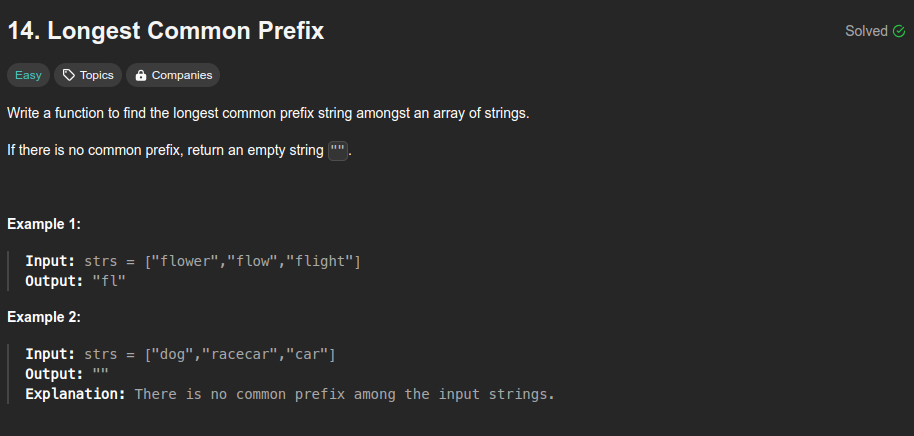

In [237]:
class Solution(object):
    def longestCommonPrefix(self, strs):
        """
        :type strs: List[str]
        :rtype: str
        """

        if len(strs)  == 1:
            return strs[0]

        i = 0
        min_len = min(len(w) for w in strs)

        if min_len == 0:
            return ''
    
        # maximum value is the min lenght word
        while True:
            # select a letter
            l = strs[0][i]
            for w in range(1, len(strs)):
                if l != strs[w][i]:
                    return strs[0][:i]
            i += 1
            if i >= min_len:
                return strs[0][:i]
            
# best solution
class Solution(object):
    def longestCommonPrefix(self, strs):
        res=""
        strs.sort()
        for i in range(len(strs[0])):
            if strs[0][i]==strs[-1][i]:
                res=res+strs[0][i]
            else:
                break
        return res

lst = ['flower', 'flow', 'flight']
lst = ['ab', 'a']
sol = Solution()
sol.longestCommonPrefix(lst)

'a'

## 15. 3 Sum
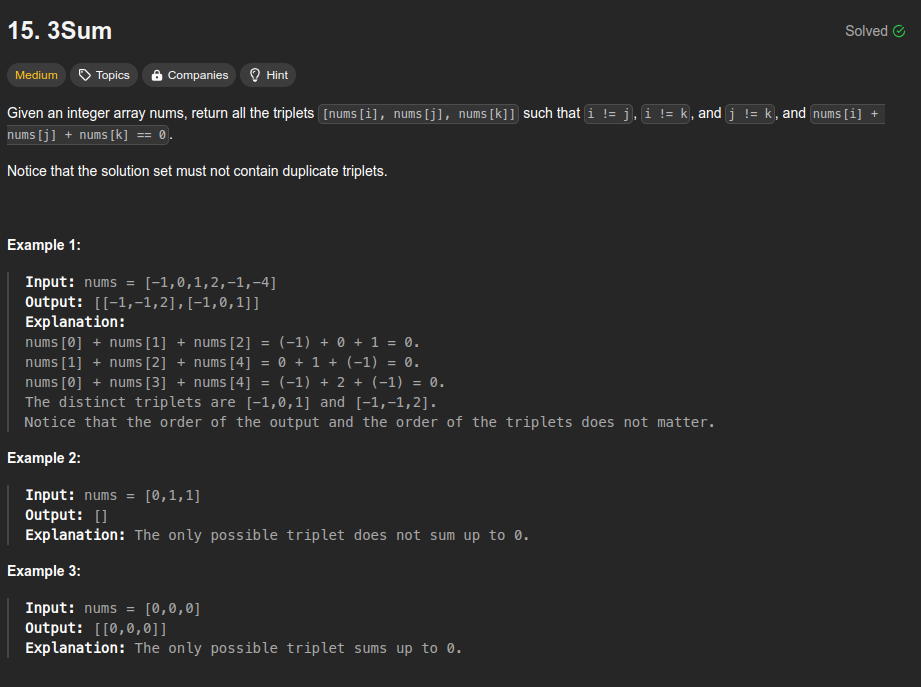

In [248]:
# intutive solution
class Solution(object):
    def threeSum(self, nums):
        """
        :type nums: List[int]
        :rtype: List[List[int]]
        """
        lst = []
        for i in range(len(nums)-2):
            for j in range(i+1, len(nums)-1):
                for k in range(j+1, len(nums)):
                    if nums[i] + nums[j] + nums[k] == 0:
                        item = sorted([nums[i], nums[j], nums[k]])
                        if item not in lst:
                            lst.append(item)
        
        return lst
    
# more advanced
    # select a numer
    # then solution will be 2 sum target = 0 - selected digit

nums = [-1,0,1,2,-1,-4]
sol = Solution()
sol.threeSum(nums)

[[-1, 0, 1], [-1, -1, 2]]

## 16. 3 Sum Closest
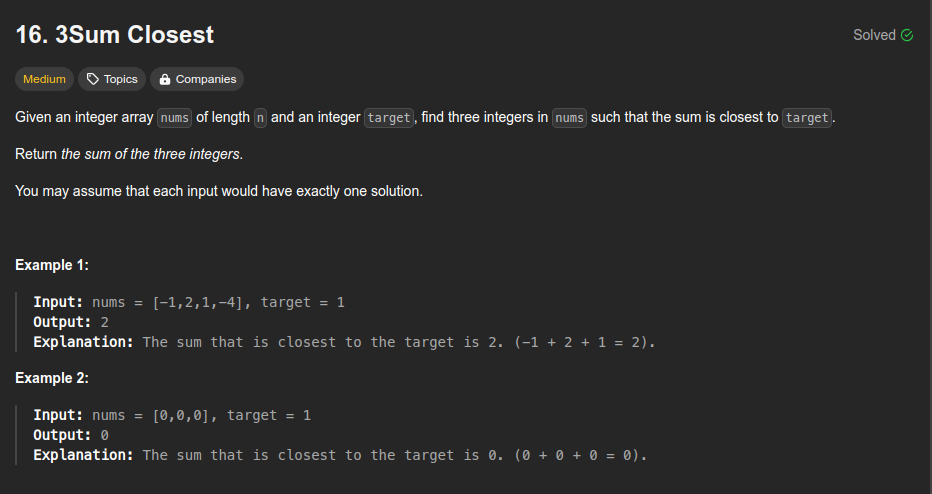

In [5]:
def sum_closest(lst, target):
    min_diff = float('inf')
    val = None
    for i in range(len(lst)-2):
        for j in range(i+1, len(lst)-1):
            for k in range(j+1, len(lst)):
                diff = abs(target - (lst[i] + lst[j] + lst[k]))
                if diff < min_diff:
                    min_diff = diff
                    val = [lst[i], lst[j], lst[k]]
                    
    return sum(val)

lst = [-1, 2, 1, -4]
target = 1
sum_closest(lst, target)

2